## **Assignment - Week 6**
**Instructions:** 
- Answer each question on a separate cell, inidcating the question first in a markdown cell before giving the answer either in a markdown or code cell depending on the question.
- Use comments in your code
- Give titles to all your charts and give x and y labels where necessary
- Use the ggplot style for your charts

You are provided with a retail transaction dataset contaning customer transaction data.

You are expected to use the dataset to answer the following questions:
1. Get the number of records and variables contained in the dataset and convert all columns to lower case.
2. Is there any null value or duplicate record present?
3. What is the new dataframe shape after dropping null and duplicate if present?
4. Create a new dataframe containing just the numerical variables and access the relationship between the variables.
5. You have a transaction date variable, convert it to a datetime variable and extract the month names and day names into two new columns
6. Check for any outlier in the price column and remove any value that is greater than 300. (use `df = df[df["price"] < 300]`)
7. Plot a scatter plot graph to access tha relationship between price and discount, give the graph a title and make the color green
8. For the new months column you created, plot a line chart showing the total quantity for each month. Use a figure size of 8x5.
9. Also for the days column you created, plot a bar chart showing the average price for each day
10. Which of the product category has the highest quantity sold? represent it in a pie chart. Use a figure size of 7x7

# Import Libraries

In [3]:
# Import the needed libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib import style

plt.style.use('ggplot')

In [4]:
# setting style
style.available
style.use('ggplot')

# Load the dataset

In [5]:
# Load the dataset
df = pd.read_csv('retail_transaction.csv')

In [6]:
# Look at the first few rows
df.head()

,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,ProductCategory,DiscountApplied(%)
0,169,B,7.0,76.15,1/31/2024 10:50,Cash,Clothing,14.2
1,213,C,4.0,85.59,6/26/2023 21:13,Credit Card,Home Decor,0.5
2,315,C,4.0,94.33,8/18/2023 07:01,Cash,Electronics,20.0
3,442,B,6.0,81.00,8/30/2023 03:37,Debit Card,Home Decor,16.0
4,587,B,1.0,45.68,9/14/2023 23:34,Credit Card,Home Decor,10.3


# Question 1:
Get the number of records and variables contained in the dataset and convert all columns to lower case

In [7]:
# Get numbers of records and variables
num_records, num_variables = df.shape

# convert all columns to lower case
df.columns = df.columns.str.lower()

# Print the number of records and variables in the dataset
print(f"Number of records: {num_records}, Number of variables: {num_variables}")

Number of records: 1167, Number of variables: 8


In [8]:
# Check first few rows to see if all the columns have been coverted to lower case
df.head()

,customerid,productid,quantity,price,transactiondate,paymentmethod,productcategory,discountapplied(%)
0,169,B,7.0,76.15,1/31/2024 10:50,Cash,Clothing,14.2
1,213,C,4.0,85.59,6/26/2023 21:13,Credit Card,Home Decor,0.5
2,315,C,4.0,94.33,8/18/2023 07:01,Cash,Electronics,20.0
3,442,B,6.0,81.00,8/30/2023 03:37,Debit Card,Home Decor,16.0
4,587,B,1.0,45.68,9/14/2023 23:34,Credit Card,Home Decor,10.3


We can see that the columns above have been converted to lower cases

# Question 2:
Is there any null value or duplicate record present?

In [9]:
# Check for null values
null_values = df.isnull().sum()

# Check for duplicate records
duplicate_records = df.duplicated().sum()

# Print null values and duplicate records
print(f'number of null values: \n{null_values}')

print()

print(f'number of duplicated records: {duplicate_records}')

number of null values: 
customerid             0
productid              4
quantity               2
price                 12
transactiondate        0
paymentmethod          5
productcategory        4
discountapplied(%)     5
dtype: int64

number of duplicated records: 2


Yes there are null values. Columns like productid, quantity, price, paymentmethod, productcategory  and discountapplied(%) have 4, 2, 12, 5, 4, and five missing values respectively.

There is only 2 duplicated records in the dataset.

# Question 3:
What is the new dataframe shape after dropping null and duplicate if present?

In [10]:
# Drop null values and duplicates
df = df.dropna().drop_duplicates()

# Get the new shape
new_shape = df.shape

# Print the new shape()
print(f'New shape: {new_shape}')

New shape: (1136, 8)


The new shape has 1136 number of records and 8 variables

# Question 4:
Create a new dataframe containing just the numerical variables and access the relationship between the variables

In [11]:
# Check for numeric data types in the dataframe
df.dtypes

customerid              int64
productid              object
quantity              float64
price                 float64
transactiondate        object
paymentmethod          object
productcategory        object
discountapplied(%)    float64
dtype: object

The numeric datatypes in the dataframe are ```int64``` and ```float64```

In [12]:
# Create new dataframe with numerical values only
df_numeric = df.select_dtypes(include=['int64', 'float64'])

In [13]:
# Look at the first few rows of the numeric dataframe
df_numeric.head()

,customerid,quantity,price,discountapplied(%)
0,169,7.0,76.15,14.2
1,213,4.0,85.59,0.5
2,315,4.0,94.33,20.0
3,442,6.0,81.00,16.0
4,587,1.0,45.68,10.3


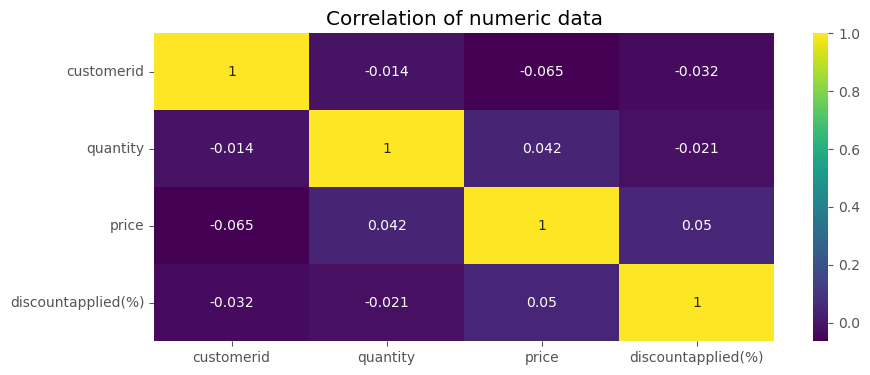

In [14]:
# Calculate the correlation matrix of the numeric data
correlation_matrix = df_numeric.corr()

# Create a figure with a specific size
plt.figure(figsize=(10, 4))

# Plot the heatmap using seaborn, with annotations showing the correlation coefficients
sns.heatmap(correlation_matrix, cmap='viridis', annot=True)

# Add a title to the heatmap
plt.title('Correlation of numeric data')

# Display the heatmap
plt.show()


```customerid``` are unique identifiers assigned to each customers. And hence, do not carry any inherent numerical meaning. So, we drop ```customerid``` from the ```df_numeric``` dataframe.

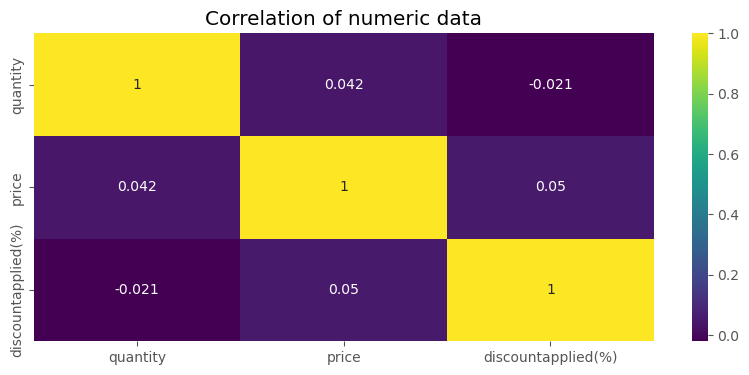

In [15]:
# Drop the numeric_id column
df_numeric = df_numeric.drop(columns='customerid', axis=1)

# Calculate the correlation matrix of the numeric data
correlation_matrix = df_numeric.corr()

# Create a figure with a specific size
plt.figure(figsize=(10, 4))

# Plot the heatmap using seaborn, with annotations showing the correlation coefficients
sns.heatmap(correlation_matrix, cmap='viridis', annot=True)

# Add a title to the heatmap
plt.title('Correlation of numeric data')

# Display the heatmap
plt.show()


## Interpretation of the Matrix
- **`quantity` vs `price` (0.042):** There is a very weak positive correlation between `quantity` and `price`.
- **`quantity` vs `discountapplied(%)` (-0.021):** There is a very weak negative correlation between `quantity` and `discountapplied(%)`.
- **`price` vs `discountapplied(%)` (0.05):** There is a very weak positive correlation between `price` and `discountapplied(%)`.
- **Diagonal Elements (`1`):** The diagonal elements show the correlation of each variable with itself, which is always `1`.

# Question 5:
You have a transaction date variable, convert it to a datetime variable and extract the month names and day names into two new columns

In [16]:
# Convert the transaction date to datetime
df['transactiondate'] = pd.to_datetime(df['transactiondate'])

# Extract month names and day names
df['month'] = df['transactiondate'].dt.month_name()
df['day'] = df['transactiondate'].dt.day_name()

# View five five rows of 'transactiondate', 'month', 'day'
df[['transactiondate', 'month', 'day']].head()

,transactiondate,month,day
0,2024-01-31 10:50:00,January,Wednesday
1,2023-06-26 21:13:00,June,Monday
2,2023-08-18 07:01:00,August,Friday
3,2023-08-30 03:37:00,August,Wednesday
4,2023-09-14 23:34:00,September,Thursday


# Question 6:
Check for any outlier in the price column and remove any value that is greater than 300. (use `df = df[df["price"] < 300]`)

In [17]:
# Find the five largest values in the 'price' column
outliers = df['price'].nlargest(5)

# Display the result
print(outliers)

78     17834.0
64      7890.0
359      321.0
17       221.0
467      190.0
Name: price, dtype: float64


In [18]:
df['price'].describe()

count     1136.000000
mean        95.442474
std        576.764608
min          2.820000
25%         43.972500
50%         71.895000
75%         94.945000
max      17834.000000
Name: price, dtype: float64

The range between the minimum and maximum value is too large.

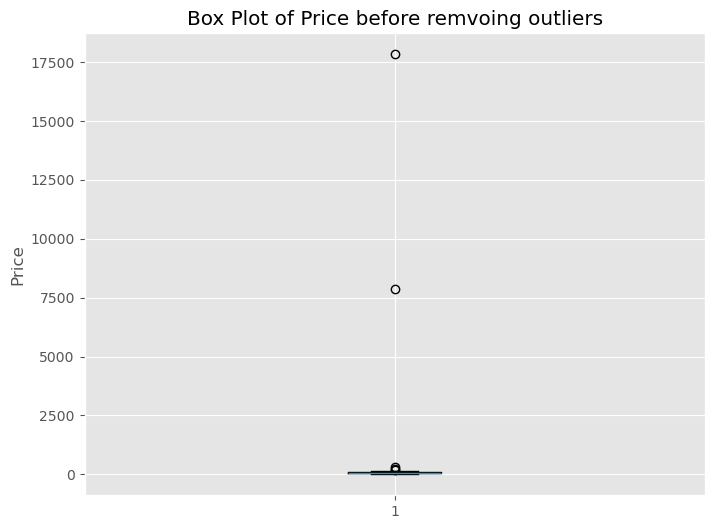

In [19]:
# Create a box plot before removing outliers
plt.figure(figsize=(8, 6))
plt.boxplot(df['price'])
plt.title('Box Plot of Price before remvoing outliers')
plt.ylabel('Price')
plt.show()


In [20]:
# Remove values greater than 300
df = df[df['price'] < 300]

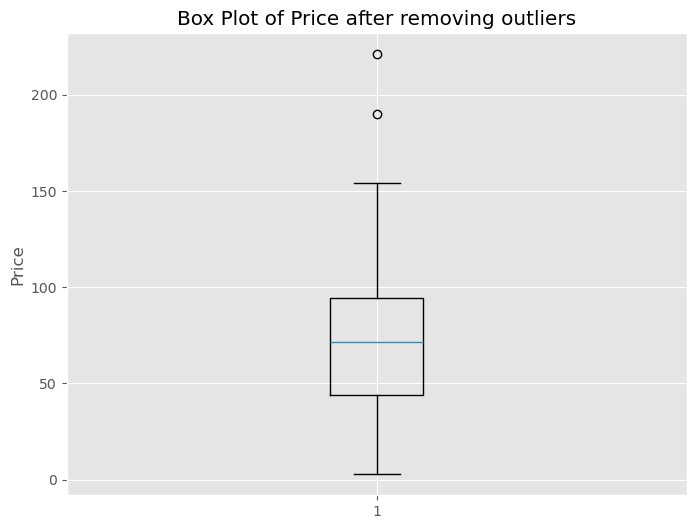

In [21]:
# Create a box plot before after removing outliers
plt.figure(figsize=(8, 6))
plt.boxplot(df['price'])
plt.title('Box Plot of Price after removing outliers')
plt.ylabel('Price')
plt.show()


# Question 7:
Plot a scatter plot graph to access tha relationship between price and discount, give the graph a title and make the color green

In [22]:
df.head()

,customerid,productid,quantity,price,transactiondate,paymentmethod,productcategory,discountapplied(%),month,day
0,169,B,7.0,76.15,2024-01-31 10:50:00,Cash,Clothing,14.2,January,Wednesday
1,213,C,4.0,85.59,2023-06-26 21:13:00,Credit Card,Home Decor,0.5,June,Monday
2,315,C,4.0,94.33,2023-08-18 07:01:00,Cash,Electronics,20.0,August,Friday
3,442,B,6.0,81.00,2023-08-30 03:37:00,Debit Card,Home Decor,16.0,August,Wednesday
4,587,B,1.0,45.68,2023-09-14 23:34:00,Credit Card,Home Decor,10.3,September,Thursday


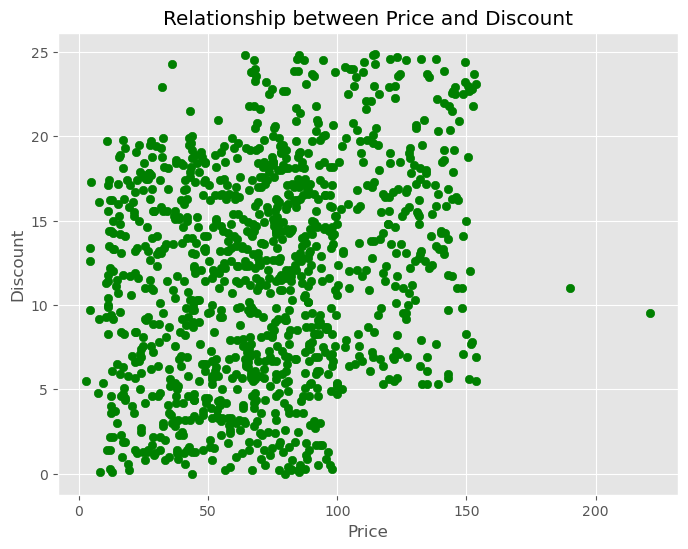

In [23]:
# Plot scatter plot between price and discount
x = df['price']
y = df['discountapplied(%)']

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='green')
plt.title('Relationship between Price and Discount')
plt.xlabel('Price')
plt.ylabel('Discount')
plt.show()

Looks like there are two outliers in the scatter plot

# Question 8:
For the new months column you created, plot a line chart showing the total quantity for each month. Use a figure size of 8x5.

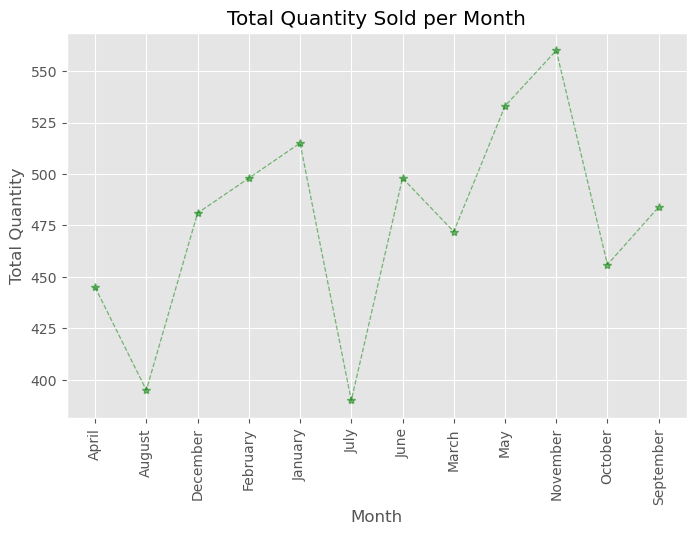

In [24]:
# Group by 'month' and sum 'quantity'
monthly_quantity = df.groupby('month')['quantity'].sum()

# Plotting
plt.figure(figsize=(8, 5))

x=monthly_quantity.index
y=monthly_quantity.values

plt.plot(x, y, color='green', linestyle='--',
         linewidth=0.9, marker="*", alpha=0.5)
plt.xticks(rotation=90)
plt.title('Total Quantity Sold per Month')
plt.xlabel("Month")
plt.ylabel("Total Quantity")
plt.grid(True)
plt.show()

# Question 9:
Also for the days column you created, plot a bar chart showing the average price for each day

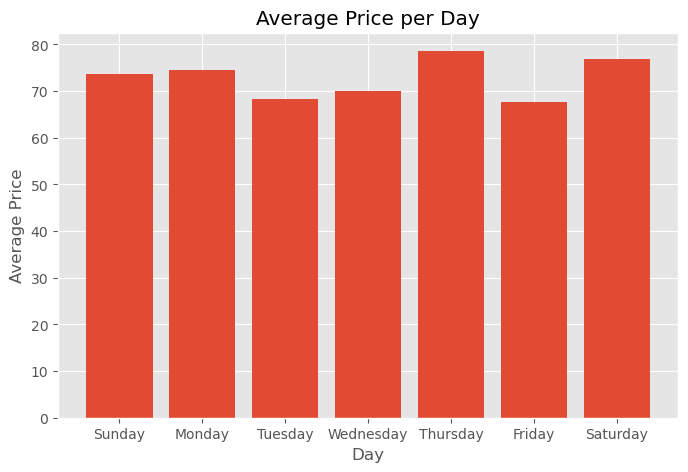

In [25]:
# Define the correct order of days
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Convert 'day' to a categorical type with the specified order
df['day'] = pd.Categorical(df['day'], categories=day_order, ordered=True)

# Plot bar chart for average price per day
average_price_per_day = df.groupby('day')['price'].mean()

x=average_price_per_day.index
y=average_price_per_day.values

plt.figure(figsize=(8, 5))
plt.bar(x, y)
plt.title('Average Price per Day')
plt.xlabel('Day')
plt.ylabel('Average Price')
plt.show()

# Question 10:
Which of the product category has the highest quantity sold? represent it in a pie chart. Use a figure size of 7x7

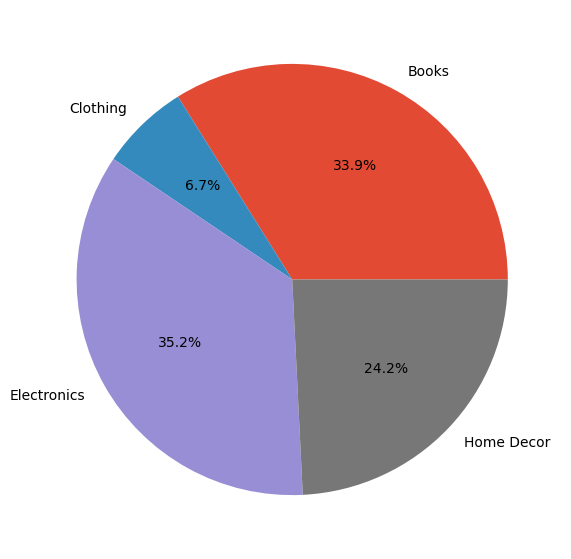

In [26]:
# Plot pie chart for product category with the highest quantity sold
category_quantity = df.groupby('productcategory')['quantity'].sum()

x=category_quantity.index
y=category_quantity.values

plt.figure(figsize=(7, 7))
plt.pie(y, labels=x, autopct='%1.1f%%')

plt.show()

The product with the highest quantity sold as depicted by our piechart is ```Electronics```(35.2%)